# CS4305TU: Week 6 - Artificial Neural Network - Assignment
## Investigating neighbourhood choice behaviour using ANNs
**7 & 11 October 2021**

- Sander van Cranenburgh
- Francisco Garrido-Valenzuela 

### General information

* For this assignment we will use *Stated Choice data* on residential location choice, collected in:
    - Mainz, Germany
    - Hanover, Germany
    - Bern, Switzerland
    - Zurich, Switzerland 

- For more details on the data, see the description provided on [Brightspace](https://brightspace.tudelft.nl/d2l/le/content/399675/viewContent/2506146/View). 

- In total you can earn **6.0** points in this assignment. 

- Add **Code cells** to complement your analyses. You can draw a lot form the snippets of codes we used for the in-class exercises.

### Submission instructions

- Answer the questions (code and/or text) in this notebook
- Rename this file by adding your group nomber (e.g. Assignment_groupXX.ipynb)
- Submit your answers both in ipynb and html format

**Provide your answers in the allocated markdown boxes** (with the red font color)


### Set up your environment

You need to set up your environment based on which platform you would like to use. In this case we offer two options:

- Google Colaboratory (Colab)
- Jupyter Lab or Notebooks (Local)

#### Using Colab

Students using **Colab**, just need to install **Biogeme**. Biogeme is a Python package designed for the maximum likelihood estimation of parametric models in general, with a special emphasis on discrete choice models. Just run the following notebook cell:

In [ ]:
# Uncomment and run this cell if you are using Google Colab (keep the exclamation mark)
#!pip install biogeme
#!git clone https://github.com/cs4305tu/assignment
#root = 'assignment/'

#### Using local environment

Students using their *local environments*, need to install all the dependencies used in this *Week 6*, to ensure compatibility, they also need to check the versions of each dependency. All dependencies are contained in the text file: **requirements.txt**. Just run the following notebook cell:

In [ ]:
# Uncomment and run this cell if you are using your local environment (keep the exclamation mark)
!pip3 install -r requirements.txt
root = ''

  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Not uninstalling typing-extensions at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Not uninstalling six at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'six'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.31.3 requires protobuf<3.18.0,>=3.12.0, but you have protobuf 3.18.0 which is incompatible.
You should consider upgrading vi

In [ ]:
!pip3 uninstall -y biogeme
!pip install biogeme --no-cache-dir

Found existing installation: biogeme 3.2.8
Uninstalling biogeme-3.2.8:
  Successfully uninstalled biogeme-3.2.8
     |████████████████████████████████| 1.5 MB 14.0 MB/s 
  Created wheel for biogeme: filename=biogeme-3.2.8-cp37-cp37m-linux_x86_64.whl size=653090 sha256=95f5e5d73454bd5aef387366a8d9e2265f71b6954e20e16769b87e570b01b18b
  Stored in directory: /tmp/pip-ephem-wheel-cache-7u2dkgm8/wheels/d4/52/61/de6c73d2bc17603c60e754e260bccb7d4da2503e97015ebd49
Successfully built biogeme
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


### Required Python packages

In the following cell add all the packages you need to finish this assignment.

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import biogeme.biogeme as bio
import biogeme.database as db
import biogeme.optimization as opt
import biogeme.messaging as msg
from biogeme import models
from biogeme.expressions import Beta
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, log_loss, accuracy_score

### Opening the database

In [ ]:
# Load the data into a dataframe
df = pd.read_csv(f'{root}datasets/neighbourhood_choice2018.dat', sep='\t')
df.head(15)


,ID,ID2,STORES1,TRANSPORT1,CITY1,NOISE1,GREEN1,FOREIGN1,STORES2,TRANSPORT2,...,NOISE3,GREEN3,FOREIGN3,CHOICE,SSTADT,RESPCITY,WOMAN,AGE,ENVCONC,COMPLETE
0,2,5,10,5,1,2,2,0.4,15,10,...,4,4,0.2,1,3,3,0,42,3.000000,1
1,2,6,15,5,4,4,1,0.1,2,10,...,2,3,0.3,2,3,3,0,42,3.000000,1
2,2,7,10,15,1,3,1,0.4,15,2,...,1,3,0.2,3,3,3,0,42,3.000000,1
3,2,8,15,15,5,4,4,0.4,2,2,...,2,2,0.2,2,3,3,0,42,3.000000,1
4,3,9,15,5,5,1,3,0.4,2,10,...,3,1,0.2,2,2,2,1,41,4.500000,1
5,3,10,5,15,1,4,4,0.2,10,2,...,2,2,0.4,2,2,2,1,41,4.500000,1
6,3,11,15,2,2,3,2,0.2,2,5,...,1,4,0.4,3,2,2,1,41,4.500000,1
7,3,12,10,2,5,1,1,0.3,15,5,...,3,3,0.1,1,2,2,1,41,4.500000,1
8,5,17,2,2,1,1,1,0.1,5,5,...,3,3,0.3,2,4,4,0,58,3.000000,1
9,5,18,5,10,5,3,3,0.1,10,15,...,1,1,0.3,1,4,4,0,58,3.000000,1


## Questions

### Q1. Do a proper descriptive analysis of the data set (1.0 pt)

It is good practice do a descriptive analysis of the data you want to model, prior to the real modelling. So inspect e.g. what levels the attributes (features) take, correlations, class (im)balances, redudant variables, missing values, etc. to attain a good feeling for the data.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


,ID,ID2,STORES1,TRANSPORT1,CITY1,NOISE1,GREEN1,FOREIGN1,STORES2,TRANSPORT2,...,NOISE3,GREEN3,FOREIGN3,CHOICE,SSTADT,RESPCITY,WOMAN,AGE,ENVCONC,COMPLETE
ID,1.000000,1.000000,-0.001783,-0.003597,0.006020,0.009978,-0.004412,0.006491,-0.003277,-0.012468,...,-0.001532,-0.000041,0.009138,0.014877,0.001364,0.001364,-0.000884,0.008534,-0.015715,0.011881
ID2,1.000000,1.000000,-0.001794,-0.003600,0.006038,0.009993,-0.004418,0.006487,-0.003268,-0.012480,...,-0.001527,-0.000025,0.009136,0.014887,0.001364,0.001364,-0.000884,0.008534,-0.015715,0.011881
STORES1,-0.001783,-0.001794,1.000000,-0.003910,0.003013,-0.009428,0.001027,-0.000476,-0.161996,0.008735,...,-0.010093,0.002757,-0.000185,0.060248,-0.013949,-0.013949,0.012194,0.013050,-0.015544,0.004566
TRANSPORT1,-0.003597,-0.003600,-0.003910,1.000000,-0.004319,-0.006553,0.000840,-0.006204,-0.009329,-0.171306,...,0.006780,0.006566,-0.007088,0.197005,-0.010080,-0.010080,-0.004547,0.001065,0.008481,-0.005631
CITY1,0.006020,0.006038,0.003013,-0.004319,1.000000,-0.012976,-0.005636,0.002963,0.000112,-0.005273,...,0.014271,0.005335,-0.004067,0.153796,0.005061,0.005061,-0.007383,-0.003575,-0.004401,0.005286
NOISE1,0.009978,0.009993,-0.009428,-0.006553,-0.012976,1.000000,0.004634,0.003638,0.003628,0.009412,...,-0.600042,-0.003761,0.003969,0.236012,-0.005589,-0.005589,0.000178,0.020722,-0.004773,-0.010012
GREEN1,-0.004412,-0.004418,0.001027,0.000840,-0.005636,0.004634,1.000000,-0.006601,0.006262,0.006174,...,0.002672,-0.600047,0.012226,-0.269186,0.006193,0.006193,0.001923,-0.004805,0.009038,-0.004898
FOREIGN1,0.006491,0.006487,-0.000476,-0.006204,0.002963,0.003638,-0.006601,1.000000,-0.004898,0.001660,...,-0.002485,-0.007879,-0.600033,0.095885,-0.007675,-0.007675,0.002411,0.005237,-0.021700,0.013481
STORES2,-0.003277,-0.003268,-0.161996,-0.009329,0.000112,0.003628,0.006262,-0.004898,1.000000,0.003833,...,0.002457,-0.004403,0.000403,-0.000457,0.001931,0.001931,-0.002827,0.004758,0.013104,-0.014279
TRANSPORT2,-0.012468,-0.012480,0.008735,-0.171306,-0.005273,0.009412,0.006174,0.001660,0.003833,1.000000,...,-0.011042,-0.007546,-0.003186,-0.095360,0.017369,0.017369,0.004260,-0.005703,0.015106,-0.012433


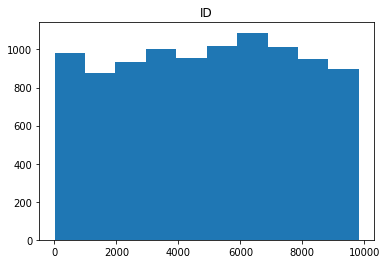

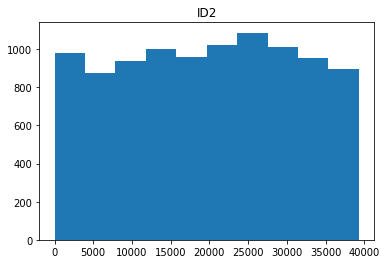

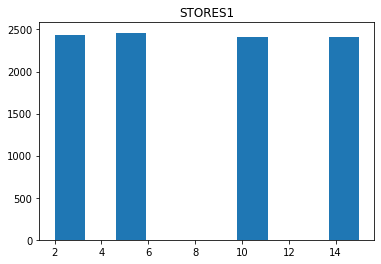

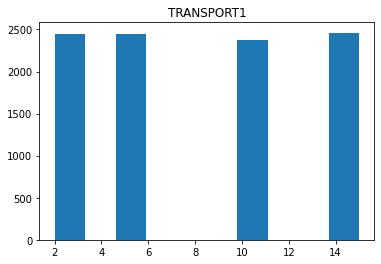

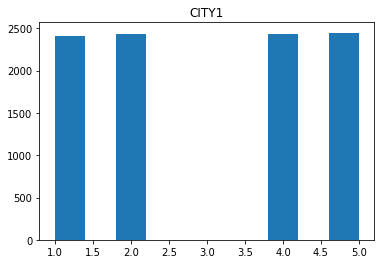

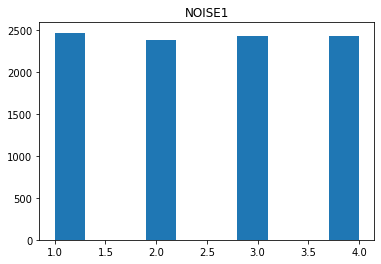

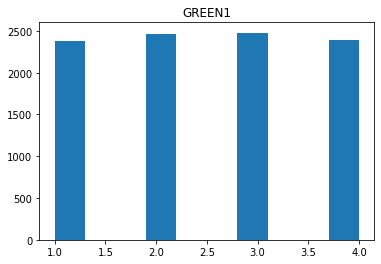

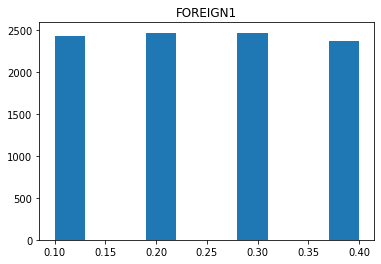

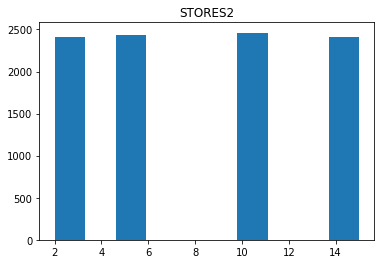

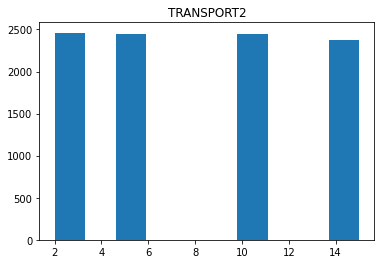

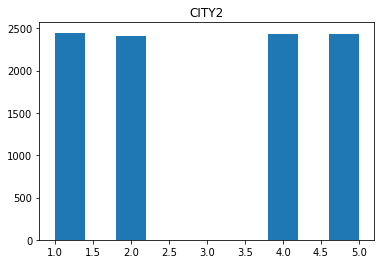

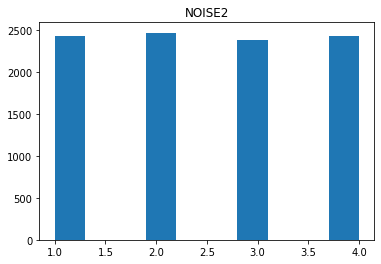

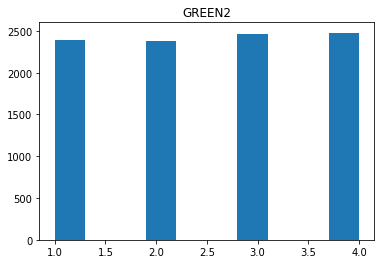

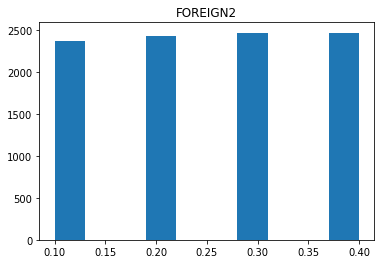

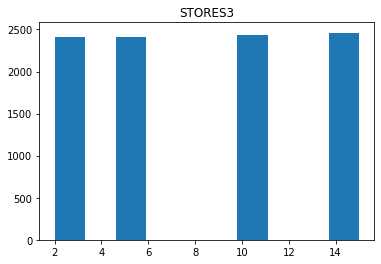

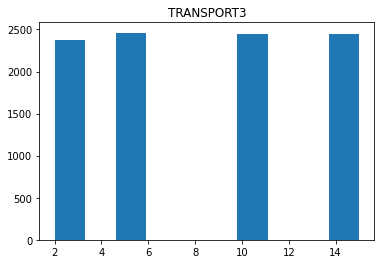

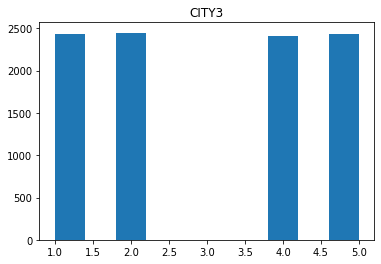

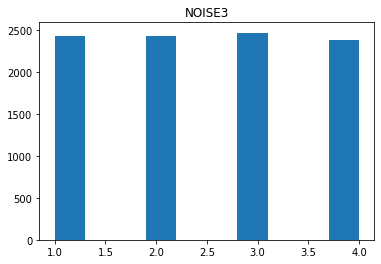

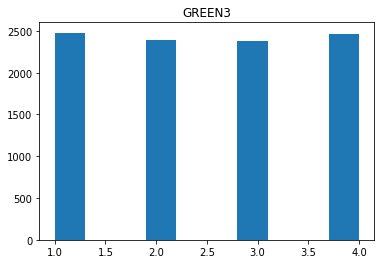

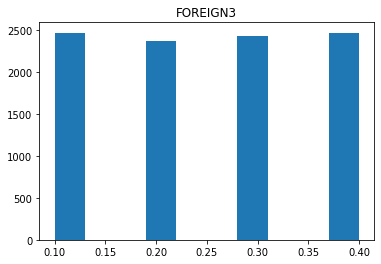

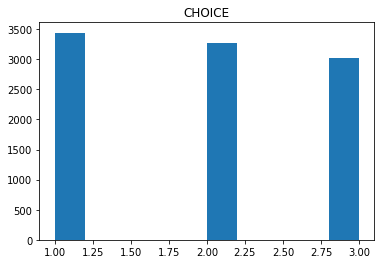

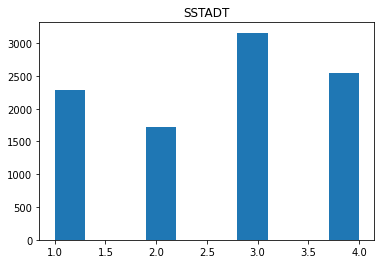

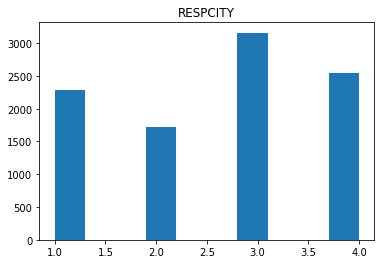

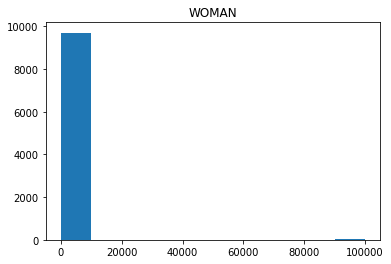

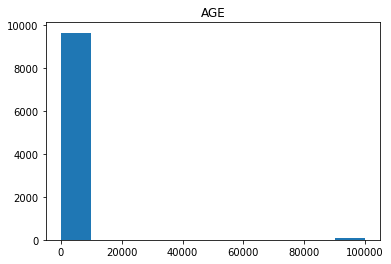

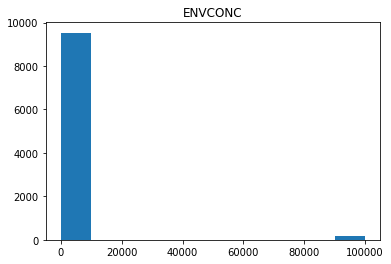

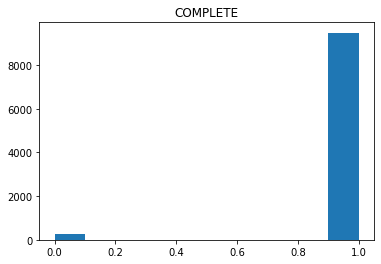

In [ ]:
for i in df.columns.values:
    fig, ax = plt.subplots()
    ax.hist(df[i])
    ax.set_title(i)

df.isnull().sum().sum()

indexes = []
for i in range(len(df)):
    if df.iloc[i]['AGE']>=10000:
        indexes.append(i)

df.drop(index=indexes)

indexes = []
for i in range(len(df)):
    if df.iloc[i]['WOMAN']>=10000:
        indexes.append(i)

df.drop(index=indexes)

indexes=[]
for i in range(len(df)):
    if df.iloc[i]['ENVCONC']>=10000:
        indexes.append(i)

df.drop(index=indexes)

indexes=[]
for i in range(len(df)):
    if df.iloc[i]['COMPLETE']==0:
        indexes.append(i)

df.drop(index=indexes)

df.corr(method='pearson')


<font color='red'>

**ANSWER Q1** <br>
<font color='black'>

In the choice experiment, there are 3 alternatives, each alternaive includes 6 attributes which are stores, transport, city, noise, green and foreigner. Each attribute has 4 levels. For stores, the 4 levels are 2 mins/ 5 mins/ 10 mins and 15 mins walking minutes to the grocery stores. For transport, the 4 levels are 2 mins/ 5 mins/ 10 mins and 15 mins walking minutes to the public transportation. For city, the 4 levels are below 1 km/ 1 to 2 km/ 3 to 4 km/ over 4 km to the city center and the categories are transformed into 1/2/4/5 numerically. For noise, the 4 levels are none/ little/ medium/ high which describe the street traffic noise and the categories are transformed into 1/2/3/4 numerically. For green, the 4 levels are none/ few/ some/ many which describe the green area in residential area and the categories are transformed into 1/2/3/4 numerically. For foreigner, the 4 levels are 0.1/ 0.2/ 0.3/ 0.4 which describe the share of foreigners in residential areas. 

In addition, the column of CHOICE is the alternative that each respondent pick. The column of SSTADT and the RESPCITY indicates the city that the respondent comes from. The column of ENVCONC indicates the ENVIRONMENTAL CONCERN of each respondent. The column of COMPLETE indicates whether the survey is completed. The column of ID indicates the index of each survey, each survey probably includes four question and the ID2 indicates the index of each question in surveys.

For the correlations, a correlation of 1 between ID and ID2, and respcity and sstadt are observed. Therefore, this data is completely redundant, as there is no new information there. Thus, the ID2 and sstadt will be dropped.

As shown in the histograms, most features are balanced among the 4 levels in each attribute. 

We do not find any missing values using the isnull function. However, we do find some "null value" in the dataset after inspecting the histograms. For example, for the age, we see that something odd happens. Some values are around 100000, which is also the case for the woman and envconc category. Also, the complete category has 0s, standing for incomplete. That indicates the null value in the dataset which can also regard as missing value. Therefore, these rows are dropped. 


### Q2. Estimate a RUM-MNL discrete choice model (1.0 pt)

Assume utility is linear additive-utility: 

$ V_{in} = \sum_{m}\beta_m x_{imn}$

And estimate marginal utilities (i.e. betas) for: 

1. Distance to Transport [min] (**Note** that distances are given in minutes)
2. Distance to City [km]
3. Distance to Stores [min] (**Note** that distances are given in minutes)
4. Traffic Noise
5. Green area
6. Share of foreigners [%]

**Note:** Do not add any other variables (features) to the model.

**To get the scores, address the following:**

- (A) Report the parameter estimates, and interpret them. i.e. do they have the expected sign? (0.5 pts)
- (B) Compute and report the cross-entropy (0.5 pts)

In [ ]:
database = db.Database('neighbourhood_choice', df)
globals().update(database.variables)
B_transport = Beta('B_Transport', 0, None, None, 0)
B_city = Beta('B_City', 0, None, None, 0)
B_stores = Beta('B_Stores', 0, None, None, 0)
B_noise = Beta('B_Noise', 0, None, None, 0)
B_green = Beta('B_Green', 0, None, None, 0)
B_foreign = Beta('B_Foreign', 0, None, None, 0)

V1 = B_transport * TRANSPORT1 + B_city * CITY1 + B_stores * STORES1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_transport * TRANSPORT2 + B_city * CITY2 + B_stores * STORES2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_transport * TRANSPORT3 + B_city * CITY3 + B_stores * STORES3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3
V = {1: V1, 2: V2, 3: V3}

 
# We use None here to show that the availability is always 1.
prob = models.loglogit(V, None, CHOICE)

# Make a Biogeme environment for the model
biogeme = bio.BIOGEME(database, prob)
biogeme.modelName = 'My second discrete choice model'
biogeme.generatePickle = False
biogeme.generateHtml = False

# Estimate the parameters
results = biogeme.estimate()

# Report the results in a pandas table
print('Estimated parameters')
print('----------')
pandasResults = results.getEstimatedParameters()
print(pandasResults[['Value','Std err','t-test','p-value']])

betas = results.getBetaValues()
prob_1 = models.logit(V, None, 1)
prob_2 = models.logit(V, None, 2)
prob_3 = models.logit(V, None, 3)
simulate_dict = {
    'Prob_1': prob_1,
    'Prob_2': prob_2,
    'Prob_3': prob_3}
simulator = bio.BIOGEME(database, simulate_dict)
probs_DCM = simulator.simulate(betas)
#print(probs_DCM)
cross_entropy_DCM = log_loss(df.CHOICE,probs_DCM)
#print(type(probs_DCM))
#Turn into integer choice values.
y_hat = []
for i in range(len(probs_DCM['Prob_1'])):
    if max(probs_DCM.iloc[i]) == probs_DCM.iloc[i]['Prob_1']:
        y_hat.append(1)
    elif max(probs_DCM.iloc[i]) == probs_DCM.iloc[i]['Prob_2']:
        y_hat.append(2)
    else:
        y_hat.append(3)
print('The accuracy of the DCM is             ','%.3f'%(accuracy_score(df.CHOICE,y_hat)))
print('The cross-entropy of the DCM is        ',"{:.3f}".format(cross_entropy_DCM))

Estimated parameters
----------
                Value   Std err     t-test  p-value
B_City      -0.167377  0.007949 -21.055636      0.0
B_Foreign   -1.196265  0.109408 -10.933969      0.0
B_Green      0.415891  0.011616  35.802259      0.0
B_Noise     -0.437465  0.011335 -38.594095      0.0
B_Stores    -0.034432  0.002577 -13.363916      0.0
B_Transport -0.073962  0.002548 -29.025990      0.0
The accuracy of the DCM is              0.570
The cross-entropy of the DCM is         0.889


<font color='red'>

**ANSWER Q2** <br>
<font color='black'>
The values of the betas seem to make sense, with negative attributes such as the distance from the city centre, level of traffic noisiness, the travel time to stores and the travel time to public transportation obtaining a negative beta value. Interestingly, the share of foreigners has the largest negative correlation, with a beta value of -1.196. One should note that this does not indicate it's the most important attribute as the unit of every beta is not comparable. 

The cross-entropy amounts to 0.889, which is quite high. This makes sense as the accuracy is also quite low, namely 0.57. Partially, this is due to white noise in the data that cannot be interpreted by any model. 

### Q3. Based on your results, compute the WtP of the average decision maker to reduce the share of foreigners in a neighbourhood by 1 percentage point in terms of the distance to the grocery stores (0.5 pts)

Thus, the answer must be of the following form: .... [minutes/percentage point].


In [ ]:
WtP_foreigner_stores = betas['B_Foreign']/betas['B_Stores']
print('Willingness to Pay estimate to reduce share of foreigners in terms of distance to the stores         = ', "%.3f"%(WtP_foreigner_stores),'minutes per percentage point of foreigners')

Willingness to Pay estimate to reduce share of foreigners in terms of distance to the stores         =  34.742 minutes per percentage point of foreigners


<font color='red'>

**ANSWER Q3** <br>
Apparently, the willingness to move away from areas with grocery shops is 34.7 to decrease a percentage point of foreigners. It seems that this is blown out of proportion, as 34 minutes further away is around 3 km. Nowadays, when moving 3 kilometers away from one supermarket another supermarket would typically be more nearby in densely populated areas. In non-densely populated areas, the factor of percentage of foreigners seems to be nonsensical as a single large foreign family may result in a high percentage. 

### Q4. Train a hybrid RUM-MNL-ANN model (1.5 pts)

Since we are interested in the WtP of Q3, make sure when building the hybrid model to place the features of the share of foreigners and of the distance to the grocery stores in the *MNL part of the model*. For the *ANN part of the model* use 2 hidden layers, with 5 nodes each. 


**To get the scores, address the following:**


- (A) Build the model, plot the loss as a function of the epochs & report the cross entropy of your final model based on the test data. (1.0 pt)
- (B) Compare the model performance to that of the discrete choice model. Interpret the result. (0.5 pts)

In [ ]:
!pip install -U tensorflow==2.6.0 keras==2.6.0

  Using cached tensorflow-2.6.0-cp37-cp37m-manylinux2010_x86_64.whl (458.3 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached grpcio-1.41.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.9 MB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Not uninstalling typing-extensions at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Not uninstalling six at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'six'. No files were found to uninstall.
  Attempting uninstall: grpcio
    Found existing installation: grpcio

In [ ]:
import numpy as np
import tensorflow as tf
print("Using tensorflow ",tf.__version__)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.layers import Conv2D, Add, Reshape
from tensorflow.keras.models import Model
from keras.utils.np_utils import to_categorical  

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, log_loss

NotFoundError: /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/core/kernels/libtfkernel_sobol_op.so: undefined symbol: _ZN10tensorflow6thread10ThreadPool26TransformRangeConcurrentlyExxRKSt8functionIFvxxEE

In [ ]:
NALT = 3           # Number of alterantives in the data set.
no_X_MNL = 2       # Number of attributes with behavioural interest (-->MNL model part).  In this example we are particularly interested in the WtP for extra storage space --> Cost & Storage
no_X_ANN = 12       # Number of features without behavioural interest (-->ANN model part). In this example we are not behaviourall interested in Camera, Size, and the socio demographic variables
num_nodes = 5      # Number of nodes in hidden layer(s). Again we use 2 hidden layers with *num_nodes* nodes each
nEpoch = 500       # Number epochs for training (max). 

In [ ]:
# INPUT FOR MNL PART
X_MNL = Input((no_X_MNL, NALT,1), name = 'Features2MNL')

# COMPUTE UTILITY FOR MNL
V_MNL = Conv2D(filters = 1, kernel_size = [no_X_MNL,1], strides = (1,1), padding = 'valid', name = 'MNL_layer', use_bias = False, trainable = True)(X_MNL)

NameError: name 'Input' is not defined

In [ ]:
# INPUT FOR ANN PART
X_ANN = Input((no_X_ANN), name ='Features2ANN')

# CREATE HIDDEN LAYER(S) OF ANN
layer1_ANN = Dense(units = num_nodes, name = "ANN_layer1", use_bias = True)(X_ANN) 
layer2_ANN = Dense(units = num_nodes, name = "ANN_layer2", use_bias = True)(layer1_ANN)

# COMPUTE UTILITY FOR ANN 
V_ANN = Dense(units = NALT, name = "V_ANN")(layer2_ANN)

In [ ]:
# RESHAPE TENSORS TO [1 X NALT]
V_MNL = Reshape([NALT], name = 'Flatten_Dim_MNL')(V_MNL)
V_ANN = Reshape([NALT], name = 'Flatten_Dim_ANN')(V_ANN) 

# SUM THE UTILITIES OF BOTH MODEL PARTS
V_MNL_ANN = Add(name = "Combining_Vs")([V_MNL,V_ANN])

# CREATE LOGIT (AKA SOFTMAX ) OUTPUT LAYER
logits = Activation('softmax', name = 'Probability')(V_MNL_ANN)

# BUILD THE MODEL
model = Model(inputs = [X_MNL, X_ANN], outputs = logits)

In [ ]:
# Define the features and the output class
X = df[['STORES1', 'TRANSPORT1', 'CITY1', 'NOISE1', 'GREEN1', 'FOREIGN1', 
        'STORES2', 'TRANSPORT2', 'CITY2', 'NOISE2', 'GREEN2', 'FOREIGN2', 
        'STORES3', 'TRANSPORT3', 'CITY3', 'NOISE3', 'GREEN3', 'FOREIGN3', 
        ]]

# Define the output target
Y = df['CHOICE']
Y_cat = to_categorical(Y-1, num_classes = 3)

In [ ]:
# Create x input for MNL layer, and rescale
scale = 1 # We cannot just use the sklearn scaler here, as it is import for the interpretation later how the input data are scaled. 

x_mnl = np.array([[np.divide(X['FOREIGN1'], scale), np.divide(X['STORES1'], scale)],
                  [np.divide(X['FOREIGN2'], scale), np.divide(X['STORES2'], scale)],
                  [np.divide(X['FOREIGN3'], scale), np.divide(X['STORES3'], scale)]])
x_mnl = np.swapaxes(x_mnl, 0, 2)
x_mnl = np.expand_dims(x_mnl, 3)
print('Shape of x_mnl', x_mnl.shape)

# Create x input for ANN layer
x_ann = np.array([[X['TRANSPORT1'], X['CITY1'], X['NOISE1'], X['GREEN1'], 
                    X['TRANSPORT2'], X['CITY2'], X['NOISE2'], X['GREEN2'],
                    X['TRANSPORT3'], X['CITY3'], X['NOISE3'], X['GREEN3']
                ]])
x_ann = np.squeeze(np.swapaxes(x_ann, 0, 2))

# Rescale input for the ANN part
scaler = StandardScaler()  
scaler.fit(x_ann)  
x_ann = scaler.transform(x_ann)  
print('Shape of x_ann',x_ann.shape)

Shape of x_mnl (9720, 2, 3, 1)
Shape of x_ann (9720, 12)


In [ ]:
# Split the data into a training and test part
X_mnl_train, X_mnl_test, Y_train, Y_test = train_test_split(x_mnl, Y_cat, random_state = 1, test_size = 0.35)
X_ann_train, X_ann_test, Y_train, Y_test = train_test_split(x_ann, Y_cat, random_state = 1, test_size = 0.35)
print('Total number of obervations in the data set = ', len(x_mnl))
print('Number of obervations in the training set   = ', len(X_mnl_train))
print('Number of obervations in the test set       = ', len(X_mnl_test))

Total number of obervations in the data set =  9720
Number of obervations in the training set   =  6318
Number of obervations in the test set       =  3402


In [ ]:
# Compile the model
model.compile(optimizer = Adam(learning_rate = 1e-2), metrics = ["accuracy"], loss = 'categorical_crossentropy')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Features2ANN (InputLayer)       [(None, 12)]         0                                            
__________________________________________________________________________________________________
ANN_layer1 (Dense)              (None, 5)            65          Features2ANN[0][0]               
__________________________________________________________________________________________________
Features2MNL (InputLayer)       [(None, 2, 3, 1)]    0                                            
__________________________________________________________________________________________________
ANN_layer2 (Dense)              (None, 5)            30          ANN_layer1[0][0]                 
____________________________________________________________________________________________

In [ ]:
# Train the model
early_stopping = EarlyStopping(patience = 4, monitor = 'val_loss')
history = model.fit([X_mnl_train, X_ann_train],Y_train, batch_size=len(X_mnl_train), epochs = nEpoch, verbose = 1, validation_data = ([X_mnl_test, X_ann_test], Y_test), callbacks = [early_stopping])

betas_layer = model.get_layer(name = 'MNL_layer')
betas = betas_layer.get_weights()

Epoch 1/500
1/1 [==============================] - 0s 63ms/step - loss: 0.8339 - accuracy: 0.6151 - val_loss: 0.8341 - val_accuracy: 0.6138
Epoch 2/500
1/1 [==============================] - 0s 23ms/step - loss: 0.8339 - accuracy: 0.6151 - val_loss: 0.8341 - val_accuracy: 0.6138
Epoch 3/500
1/1 [==============================] - 0s 30ms/step - loss: 0.8339 - accuracy: 0.6151 - val_loss: 0.8341 - val_accuracy: 0.6138
Epoch 4/500
1/1 [==============================] - 0s 36ms/step - loss: 0.8339 - accuracy: 0.6151 - val_loss: 0.8341 - val_accuracy: 0.6138
Epoch 5/500
1/1 [==============================] - 0s 25ms/step - loss: 0.8339 - accuracy: 0.6151 - val_loss: 0.8341 - val_accuracy: 0.6138
Epoch 6/500
1/1 [==============================] - 0s 26ms/step - loss: 0.8339 - accuracy: 0.6151 - val_loss: 0.8341 - val_accuracy: 0.6138


In [ ]:
# plot loss as a function of epochs
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],     color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'red', label = 'test')
plt.ylim(0.4,7)

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],     color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'red', label = 'test')
plt.ylim(0, 1)
plt.legend()

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace = 0.5)

NameError: name 'plt' is not defined

In [ ]:
print('The accuracy on the test data of the tensor flow ANN is',"{:.3f}".format(history.history['accuracy'][-1]))
print('The cross-entropy on the test data of the tensor flow ANN is',"{:.3f}".format(history.history['loss'][-1]))

The accuracy on the test data of the tensor flow ANN is 0.615
The cross-entropy on the test data of the tensor flow ANN is 0.834


<font color='red'>

**ANSWER Q4** <br>

Using a hybrid model, we improve a little on the previously obtained accuracy, namely 0.615 vs 0.570. This also means we obtain a slightly lower cross-entropy of 0.834 vs 0.889. From our results it can be concluded that adding an ANN component to the model, creating a hybrid solution, is an effective way to (slightly) boost the performance of the predictions. One could play around with the hyperparameters to see whether accuracy could be improved even more, but that is out of scope for this assignment.

### Q5. Compute the WtP of the average decision maker to reduce the share of foreigners in a neighbourhood by 1 percentage point using the results from the hybrid model. Compare the outcome with the results of your discrete choice model (0.5 pts)

In [ ]:
# Show the trained taste parameters, from the MNL part
beta_FOREIGN = np.squeeze((betas[0][0]))
beta_STORES = np.squeeze((betas[0][1]))

# Compute the Willingness to Pay
WtP_hybrid = beta_FOREIGN/beta_STORES
print(beta_FOREIGN)
print(beta_STORES)
print('WtP =', "{:.2f}".format(WtP_hybrid),'minutes further from store for 1% lower share of foreigners')

WtP = 39.29 minutes further from store for 1% lower share of foreigners


<font color='red'>

**ANSWER Q5** <br>
When compared to the WtP calculated in Q3, namely 34.74, the hybrid model resulted in a somewhat higher answer of 39.29 minutes. So the hybrid model predicts that overall, the people from the survey are a little more xenophobic.

### Q6. Explore whether, or not, the preferences of the inhabitants of the four cities regarding the trade-off between share of foreigners and distance to grocery stores are equal across the four cities. (1.5 pts)

Perform a series of (clever) analyses, and interpret the findings. In other words, can we conclude that the inhabintants of all cities are equally xenophobic? For these analysis, use hybrid models, and/or DCMs.

**Hint:** create new features capturing for the share of foreigners *per city*. 

In [ ]:
grouped = df.groupby(df.RESPCITY)
df_respcity_1 = grouped.get_group(1)

df_respcity_2 = grouped.get_group(2)

df_respcity_3 = grouped.get_group(3)

df_respcity_4 = grouped.get_group(4)

<font color='red'>

**ANSWER Q6** <br>
As shown in dataset, the respondents come from four different cities which names 1 to 4.
We using groupby to extract the data of each RESCITY and create the dataframe representively. Then, apply the discrete choice model for each RESCITY dataset. The result of WtP shows that the respondents from different cities have different trade-off between share of foreigners and distance to grocery stores. The respondents from city 1 are willing to walk 50.855 minutes more to exchange for one percentage point of reduction of share of foreigners. The respondents from city 2, 3 and 4 are 98.020 minutes, 17.001 minutes, 13.170 minutes respectively.

Analyzing these values it can be concluded that the values for city 1 and 2 are too high and not realistic and that for city 3 and 4 might be realistic although still relatively high. The data has four attributes for the time it takes to reach the store, which are 2, 5, 10 and 15 minutes. If people are willing to walk 17 and 13 minutes extra (Cities 3 and 4) to the store for one percentage point of reduction, then that is closely to twice the maximum observed walking time to the store. Let alone compared to that of the minimum observed walking time of 2 minutes. it is therefore rather unlikely that people are willing to do this purely for the sake or one percentage point of reduction, but it remains a possibility. For cities 1 and 2, their willingness is even higher namely 50 and 98 minutes respectively. This seems completely unlikely that people are willing to walk up to 50 times the normal time it would take to walk to the store extra purely for one percentage point of reduction. 

Then are these values false and how can it be that these values were obtained?
This is due to the nature of the DCM which uses a linear relation between all the beta factors and the attributes themselves and the lack of noise implemented into the model. The linear relation means that in the model there are no dependencies or correlations possible between two or more attributes that might exist in reality. Such are hidden layers which can be found by an ANN. Above this, there is another factor that cannot be implemented in this model which is a preference of people for a certain alternative or attribute due to their values and opinions. 

In [ ]:
#Respcity 1 
database_1 = db.Database('neighbourhood_choice', df_respcity_1)
globals().update(database_1.variables)
B_transport = Beta('B_Transport', 0, None, None, 0)
B_city = Beta('B_City', 0, None, None, 0)
B_stores = Beta('B_Stores', 0, None, None, 0)
B_noise = Beta('B_Noise', 0, None, None, 0)
B_green = Beta('B_Green', 0, None, None, 0)
B_foreign = Beta('B_Foreign', 0, None, None, 0)

V1 = B_transport * TRANSPORT1 + B_city * CITY1 + B_stores * STORES1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_transport * TRANSPORT2 + B_city * CITY2 + B_stores * STORES2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_transport * TRANSPORT3 + B_city * CITY3 + B_stores * STORES3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3
V = {1: V1, 2: V2, 3: V3}

 
# We use None here to show that the availability is always 1.
prob = models.loglogit(V, None, CHOICE)

# Make a Biogeme environment for the model
biogeme = bio.BIOGEME(database_1, prob)
biogeme.modelName = 'Discrete choice model'
biogeme.generatePickle = False
biogeme.generateHtml = False

# Estimate the parameters
results = biogeme.estimate()

# Report the results in a pandas table
# print('Estimated parameters')
# print('----------')
# pandasResults = results.getEstimatedParameters()
# print(pandasResults[['Value','Std err','t-test','p-value']])
betas = results.getBetaValues()

WtP_foreigner_stores_1 = betas['B_Foreign']/betas['B_Stores']
print('Willingness to Pay estimate to reduce share of foreigners in terms of distance to the stores         = ', "%.3f"%(WtP_foreigner_stores_1),'minutes per percentage point of foreigners')

Willingness to Pay estimate to reduce share of foreigners in terms of distance to the stores         =  50.855 minutes per percentage point of foreigners


In [ ]:
#Respcity 2
database_2 = db.Database('neighbourhood_choice', df_respcity_2)
globals().update(database_2.variables)
B_transport = Beta('B_Transport', 0, None, None, 0)
B_city = Beta('B_City', 0, None, None, 0)
B_stores = Beta('B_Stores', 0, None, None, 0)
B_noise = Beta('B_Noise', 0, None, None, 0)
B_green = Beta('B_Green', 0, None, None, 0)
B_foreign = Beta('B_Foreign', 0, None, None, 0)

V1 = B_transport * TRANSPORT1 + B_city * CITY1 + B_stores * STORES1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_transport * TRANSPORT2 + B_city * CITY2 + B_stores * STORES2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_transport * TRANSPORT3 + B_city * CITY3 + B_stores * STORES3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3
V = {1: V1, 2: V2, 3: V3}

 
# We use None here to show that the availability is always 1.
prob = models.loglogit(V, None, CHOICE)

# Make a Biogeme environment for the model
biogeme = bio.BIOGEME(database_2, prob)
biogeme.modelName = 'Discrete choice model'
biogeme.generatePickle = False
biogeme.generateHtml = False

# Estimate the parameters
results = biogeme.estimate()

# Report the results in a pandas table
# print('Estimated parameters')
# print('----------')
# pandasResults = results.getEstimatedParameters()
# print(pandasResults[['Value','Std err','t-test','p-value']])
betas = results.getBetaValues()

WtP_foreigner_stores_2 = betas['B_Foreign']/betas['B_Stores']
print('Willingness to Pay estimate to reduce share of foreigners in terms of distance to the stores         = ', "%.3f"%(WtP_foreigner_stores_2),'minutes per percentage point of foreigners')

Willingness to Pay estimate to reduce share of foreigners in terms of distance to the stores         =  98.020 minutes per percentage point of foreigners


In [ ]:
#Respcity 3
database_3 = db.Database('neighbourhood_choice', df_respcity_3)
globals().update(database_3.variables)

B_transport = Beta('B_Transport', 0, None, None, 0)
B_city = Beta('B_City', 0, None, None, 0)
B_stores = Beta('B_Stores', 0, None, None, 0)
B_noise = Beta('B_Noise', 0, None, None, 0)
B_green = Beta('B_Green', 0, None, None, 0)
B_foreign = Beta('B_Foreign', 0, None, None, 0)

# We use None here to show that the availability is always 1.
prob = models.loglogit(V, None, CHOICE)

# Make a Biogeme environment for the model
biogeme = bio.BIOGEME(database_3, prob)
biogeme.modelName = 'Discrete choice model'
biogeme.generatePickle = False
biogeme.generateHtml = False

# Estimate the parameters
results = biogeme.estimate()

# Report the results in a pandas table
# print('Estimated parameters')
# print('----------')
# pandasResults = results.getEstimatedParameters()
# print(pandasResults[['Value','Std err','t-test','p-value']])
betas = results.getBetaValues()


WtP_foreigner_stores_3 = betas['B_Foreign']/betas['B_Stores']
print('Willingness to Pay estimate to reduce share of foreigners in terms of distance to the stores         = ', "%.3f"%(WtP_foreigner_stores_3),'minutes per percentage point of foreigners')

Willingness to Pay estimate to reduce share of foreigners in terms of distance to the stores         =  17.001 minutes per percentage point of foreigners


In [ ]:
#Respcity 4
database_4 = db.Database('neighbourhood_choice', df_respcity_4)
globals().update(database_4.variables)
B_transport = Beta('B_Transport', 0, None, None, 0)
B_city = Beta('B_City', 0, None, None, 0)
B_stores = Beta('B_Stores', 0, None, None, 0)
B_noise = Beta('B_Noise', 0, None, None, 0)
B_green = Beta('B_Green', 0, None, None, 0)
B_foreign = Beta('B_Foreign', 0, None, None, 0)

# We use None here to show that the availability is always 1.
prob = models.loglogit(V, None, CHOICE)

# Make a Biogeme environment for the model
biogeme = bio.BIOGEME(database_4, prob)
biogeme.modelName = 'Discrete choice model'
biogeme.generatePickle = False
biogeme.generateHtml = False

# Estimate the parameters
results = biogeme.estimate()

# Report the results in a pandas table
# print('Estimated parameters')
# print('----------')
# pandasResults = results.getEstimatedParameters()
# print(pandasResults[['Value','Std err','t-test','p-value']])
betas = results.getBetaValues()

WtP_foreigner_stores_4 = betas['B_Foreign']/betas['B_Stores']
print('Willingness to Pay estimate to reduce share of foreigners in terms of distance to the stores         = ', "%.3f"%(WtP_foreigner_stores_4),'minutes per percentage point of foreigners')

Willingness to Pay estimate to reduce share of foreigners in terms of distance to the stores         =  13.170 minutes per percentage point of foreigners


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8ad46a34-f541-4527-b60e-9406e1d2b4c0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>